<a href="https://colab.research.google.com/github/Ira00/nn2022/blob/main/LR_4/LR_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота №4
студентки 3 курсу групи КН-31
Івахненко Ірини

## Завдання 1

На основі документу вирішити завдання класифікації для набору даних Fashion MNIST.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# fashion_mnist = keras.datasets.fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
print(len(train_data), len(test_data))


60000 10000


## Завдання 2

Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у списку групи.
6, 9, 3

In [ ]:
import numpy as np

class_names = ['Dress','Shirt','Ankle boot']

train_data_new = []
train_labels_new = []
test_data_new = []
test_labels_new = []

for i in range(len(train_labels)):
  if (train_labels[i] in [3,6,9] ):
    train_data_new.append(train_data[i])
    train_labels_new.append(train_labels[i])
for i in range(len(test_labels)):
  if (test_labels[i] in [3,6,9] ):
    test_data_new.append(test_data[i])
    test_labels_new.append(test_labels[i])

print(len(train_data_new), len(test_data_new))

print(train_data_new[0][5])

train_labels_new = np.array(train_labels_new)
test_labels_new = np.array(test_labels_new)
train_data_new = np.array(train_data_new) / 255.0
test_data_new = np.array(test_data_new) / 255.0

print(train_data_new[0][5])


18000 3000
[  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
 144 123  23   0   0   0   0  12  10   0]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.02352941 0.         0.4        0.8        0.69019608 0.5254902
 0.56470588 0.48235294 0.09019608 0.         0.         0.
 0.         0.04705882 0.03921569 0.        ]


## Завдання 3


Моделювання провести із використанням нейронної мережі (Flatten & Dense layers).


In [ ]:
tf.random.set_seed(42)


model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])


model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])


history = model.fit(train_data_new,
                       train_labels_new,
                       epochs=40,
                       validation_data=(test_data_new, test_labels_new))

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


563/563 [==============================] - 3s 5ms/step - loss: 0.5877 - accuracy: 0.8412 - val_loss: 0.1624 - val_accuracy: 0.9467
Epoch 2/40
563/563 [==============================] - 2s 4ms/step - loss: 0.1240 - accuracy: 0.9556 - val_loss: 0.1518 - val_accuracy: 0.9443
Epoch 3/40
563/563 [==============================] - 2s 4ms/step - loss: 0.1102 - accuracy: 0.9601 - val_loss: 0.1414 - val_accuracy: 0.9513
Epoch 4/40
563/563 [==============================] - 2s 4ms/step - loss: 0.1051 - accuracy: 0.9613 - val_loss: 0.1362 - val_accuracy: 0.9497
Epoch 5/40
563/563 [==============================] - 2s 4ms/step - loss: 0.1006 - accuracy: 0.9626 - val_loss: 0.1355 - val_accuracy: 0.9540
Epoch 6/40
563/563 [==============================] - 2s 4ms/step - loss: 0.0989 - accuracy: 0.9637 - val_loss: 0.1323 - val_accuracy: 0.9527
Epoch 7/40
563/563 [==============================] - 2s 4ms/step - loss: 0.0959 - accuracy: 0.9637 - val_loss: 0.1375 - val_accuracy: 0.9540
Epoch 8/40
563/56

## Завдання 4

Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.


Text(0.5, 1.0, 'Finding the ideal learning rate')

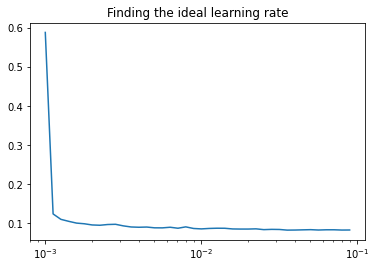

In [ ]:
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, history.history["loss"]) 
plt.title("Finding the ideal learning rate")




94/94 [==============================] - 0s 3ms/step - loss: 0.1531 - accuracy: 0.9520


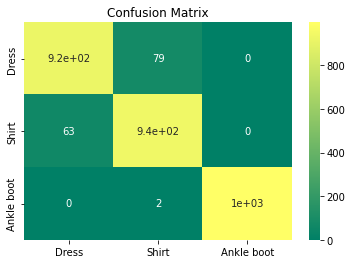

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

test_loss, test_acc = model.evaluate(test_data_new, test_labels_new)


predictions = model.predict(test_data_new)
y_predictions = []
for i in predictions:
  i_max = np.argmax(i)
  y_predictions = np.append(y_predictions, i_max)

cm = confusion_matrix(test_labels_new, y_predictions)
dataframe_cm = pd.DataFrame(cm, index = class_names, columns = class_names)

sns.heatmap(dataframe_cm, annot=True, cmap="summer")
plt.title('Confusion Matrix')


plt.show()


# Висновок:
в ході лабораторної роботи вирішили завдання класифікації для набору даних 3 класів 'Dress','Shirt','Ankle boot' з Fashion MNIST.
